# **Online Sales**

[Online Sales Data](https://www.kaggle.com/datasets/shreyanshverma27/online-sales-dataset-popular-marketplace-data)

## Imports / Mounts

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Save the filepath and load the data as df
fpath = "G:\My Drive\Github and LinkedIn Work\Projects\Online Sales\Online Sales Data.csv"
df = pd.read_csv(fpath)
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


## EDA

In [3]:
# Check Data types
df.dtypes

Transaction ID        int64
Date                 object
Product Category     object
Product Name         object
Units Sold            int64
Unit Price          float64
Total Revenue       float64
Region               object
Payment Method       object
dtype: object

In [8]:
# Checking for duplicates
duplicates = df.duplicated()

# Counting the number of duplicates
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


## Values

In [7]:
# Checking for missing values
missing_values = df.isnull().sum()

# Displaying the count of missing values for each column
print(missing_values)

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


In [13]:
# Identify columns with categorical data
categorical_columns = ['Product Category', 'Product Name', 'Region', 'Payment Method',]

In [10]:
# Check unique values in categorical columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

Unique values in Product Category:
['Electronics' 'Home Appliances' 'Clothing' 'Books' 'Beauty Products'
 'Sports']

Unique values in Product Name:
['iPhone 14 Pro' 'Dyson V11 Vacuum' "Levi's 501 Jeans" 'The Da Vinci Code'
 'Neutrogena Skincare Set' 'Wilson Evolution Basketball'
 'MacBook Pro 16-inch' 'Blueair Classic 480i' 'Nike Air Force 1'
 'Dune by Frank Herbert' 'Chanel No. 5 Perfume'
 'Babolat Pure Drive Tennis Racket' 'Samsung Galaxy Tab S8'
 'Keurig K-Elite Coffee Maker' 'North Face Down Jacket'
 'Salt, Fat, Acid, Heat by Samin Nosrat' 'Dyson Supersonic Hair Dryer'
 'Manduka PRO Yoga Mat' 'Garmin Forerunner 945'
 'Ninja Professional Blender' 'Zara Summer Dress'
 'Gone Girl by Gillian Flynn' 'Olay Regenerist Face Cream'
 'Adidas FIFA World Cup Football' 'Bose QuietComfort 35 Headphones'
 'Panasonic NN-SN966S Microwave' 'Adidas Ultraboost Shoes'
 'Pride and Prejudice by Jane Austen' 'MAC Ruby Woo Lipstick'
 'Nike Air Zoom Pegasus 37' 'Sony WH-1000XM4 Headphones' 'Instant Pot Duo'

In [12]:
# Selecting numerical columns
numerical_columns = ['Units Sold', 'Unit Price', 'Total Revenue']

# Calculate and display summary statistics
for column in numerical_columns:
    column_data = df[column]
    column_min = column_data.min()
    column_max = column_data.max()
    column_mean = column_data.mean()
    print(f"Summary statistics for {column}:")
    print(f"Minimum: {column_min}")
    print(f"Maximum: {column_max}")
    print(f"Mean: {column_mean}")
    print()

Summary statistics for Units Sold:
Minimum: 1
Maximum: 10
Mean: 2.158333333333333

Summary statistics for Unit Price:
Minimum: 6.5
Maximum: 3899.99
Mean: 236.3955833333333

Summary statistics for Total Revenue:
Minimum: 6.5
Maximum: 3899.99
Mean: 335.699375



## Questions & Answers

With Visuals

WITHOUT MODELING.

[Questions](https://docs.google.com/document/d/1iYPfmIS0IUvwFTE5LdCoJvCqYrKklFW4HoAB037ETSI/edit?usp=sharing)

### **Sales Trends and Seasonal Patterns**

Question: What are the monthly sales trends over the past year?

To analyze monthly sales trends, we need to extract the month from the date column and aggregate sales data accordingly.

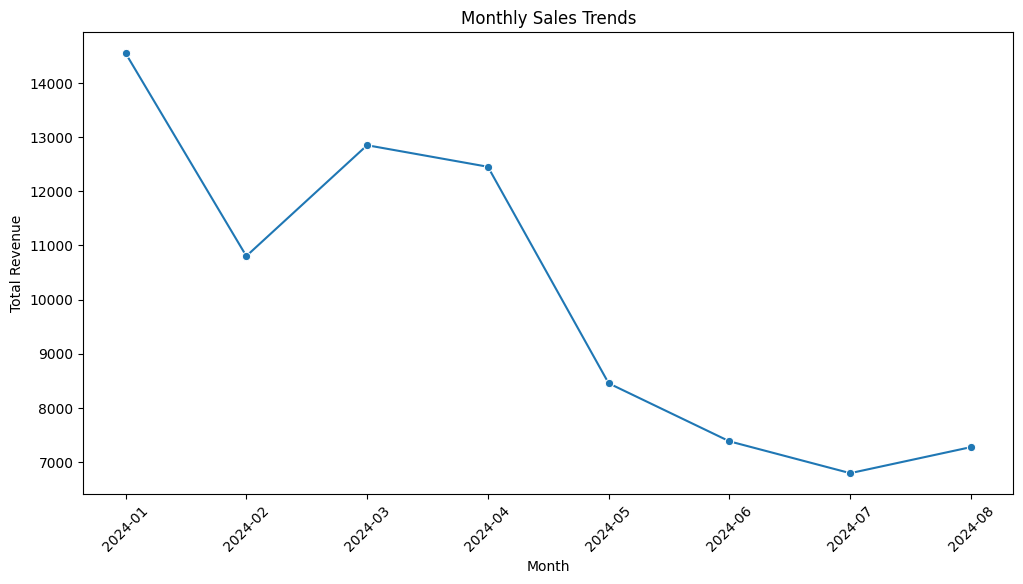

In [26]:
# Extract month from date
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Aggregate sales by month
monthly_sales = df.groupby('Month').agg({'Total Revenue': 'sum'}).reset_index()

# Plotting monthly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Revenue', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

Question: Are there any specific months or quarters where sales spike?

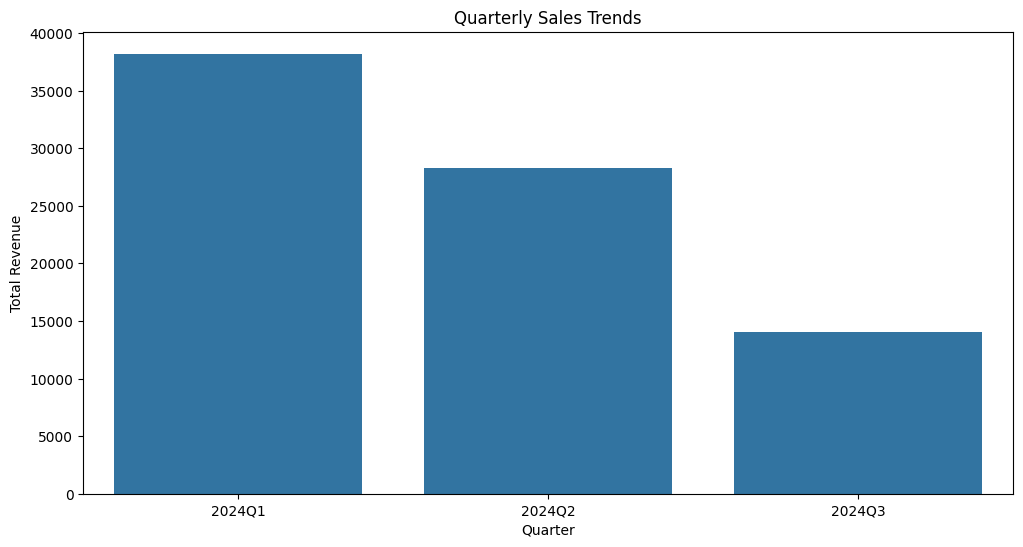

In [18]:
# Extract quarter from date
df['Quarter'] = df['Date'].dt.to_period('Q')

# Aggregate sales by quarter
quarterly_sales = df.groupby('Quarter').agg({'Total Revenue': 'sum'}).reset_index()

# Plotting quarterly sales trends
plt.figure(figsize=(12, 6))
sns.barplot(data=quarterly_sales, x='Quarter', y='Total Revenue')
plt.title('Quarterly Sales Trends')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.show()


**Product Category Analysis**

Question: Which product categories generate the highest revenue?

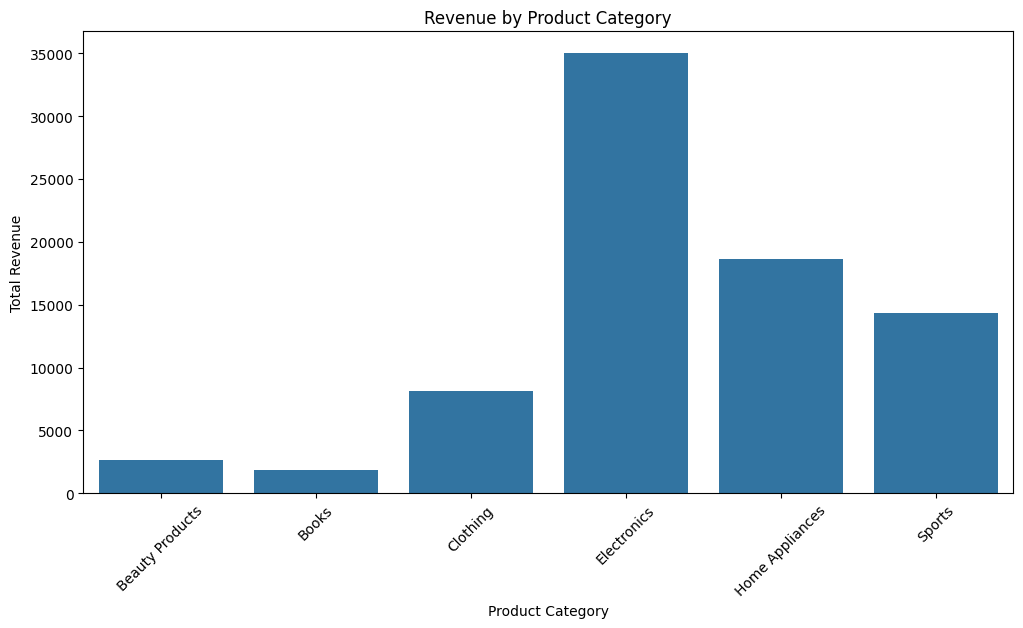

In [19]:
# Aggregate sales by product category
category_sales = df.groupby('Product Category').agg({'Total Revenue': 'sum'}).reset_index()

# Plotting revenue by product category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='Product Category', y='Total Revenue')
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


Question: How do sales of different product categories vary across regions?

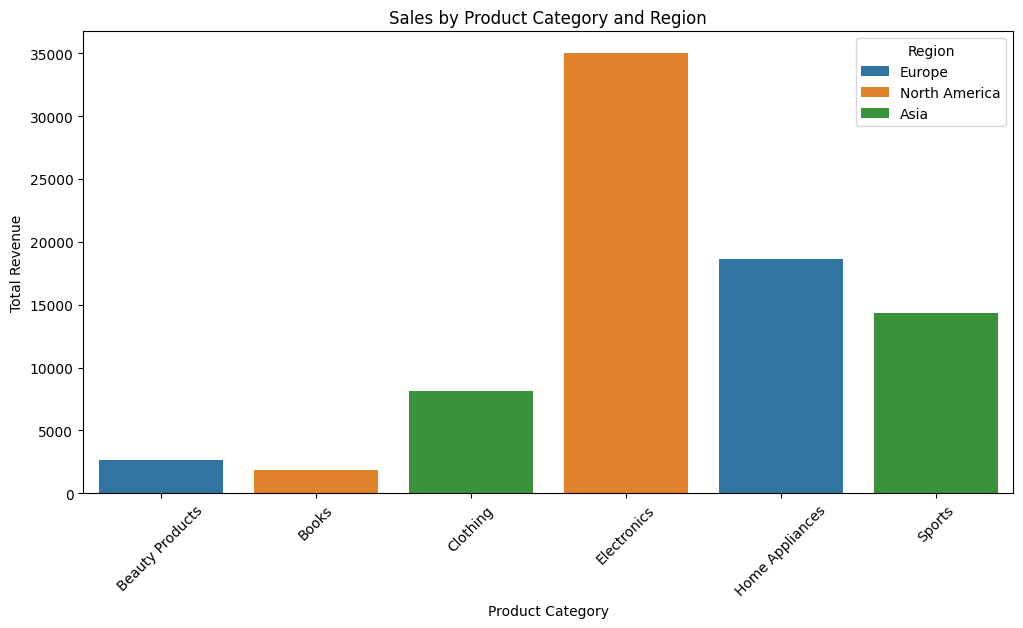

In [20]:
# Aggregate sales by product category and region
category_region_sales = df.groupby(['Product Category', 'Region']).agg({'Total Revenue': 'sum'}).reset_index()

# Plotting sales by category and region
plt.figure(figsize=(12, 6))
sns.barplot(data=category_region_sales, x='Product Category', y='Total Revenue', hue='Region')
plt.title('Sales by Product Category and Region')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()


**Payment Method Impact**

Question: What is the distribution of sales volume and revenue across different payment methods?

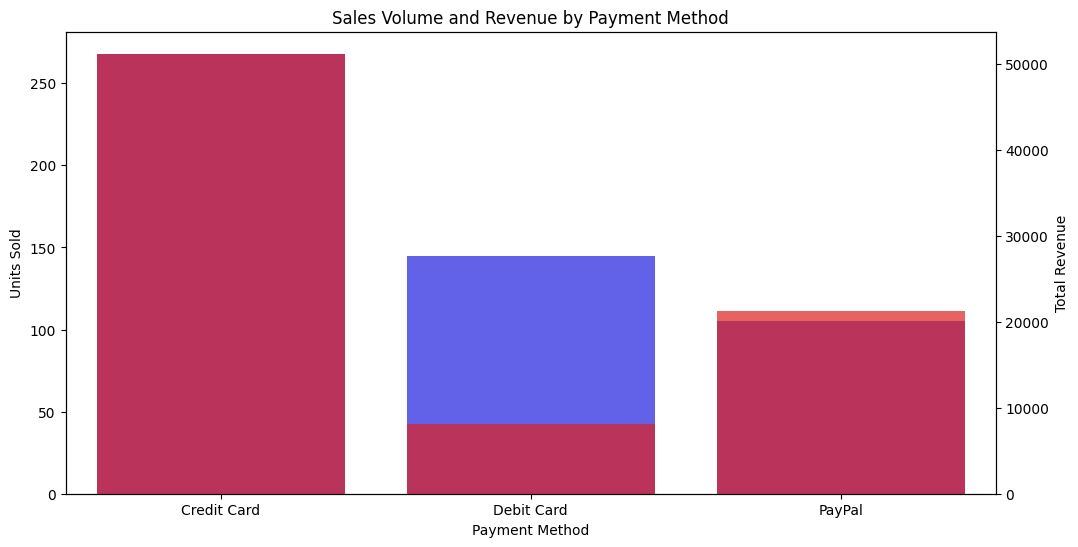

In [21]:
# Aggregate sales and volume by payment method
payment_sales = df.groupby('Payment Method').agg({'Total Revenue': 'sum', 'Units Sold': 'sum'}).reset_index()

# Plotting sales volume and revenue by payment method
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(data=payment_sales, x='Payment Method', y='Units Sold', ax=ax1, color='b', alpha=0.7)
ax1.set_ylabel('Units Sold')
ax1.set_title('Sales Volume and Revenue by Payment Method')

ax2 = ax1.twinx()
sns.barplot(data=payment_sales, x='Payment Method', y='Total Revenue', ax=ax2, color='r', alpha=0.7)
ax2.set_ylabel('Total Revenue')

plt.show()


Question: Do certain payment methods lead to higher average order values?

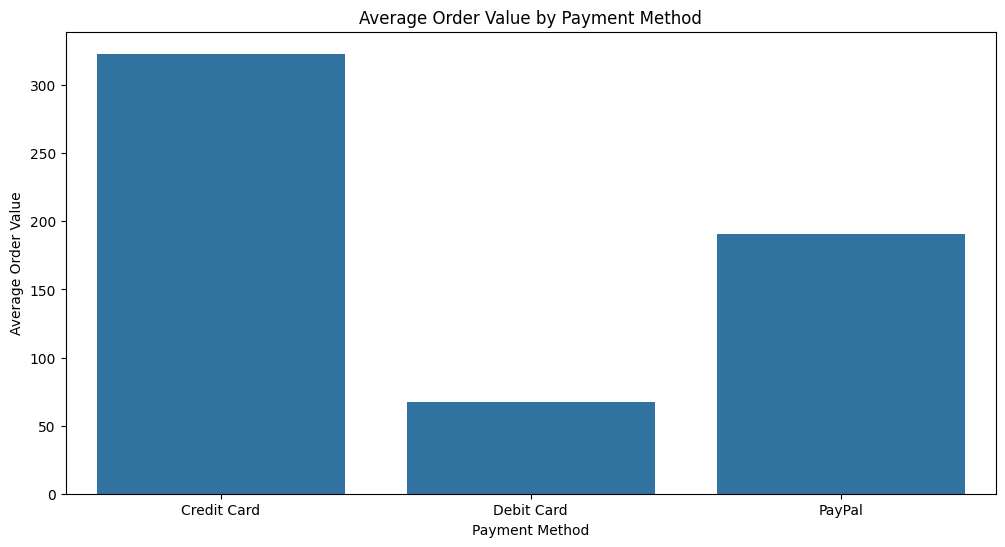

In [22]:
# Calculate average order value by payment method
df['Average Order Value'] = df['Total Revenue'] / df['Units Sold']
payment_avg_order_value = df.groupby('Payment Method').agg({'Average Order Value': 'mean'}).reset_index()

# Plotting average order value by payment method
plt.figure(figsize=(12, 6))
sns.barplot(data=payment_avg_order_value, x='Payment Method', y='Average Order Value')
plt.title('Average Order Value by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Order Value')
plt.show()


**Correlation Analysis**

Correlation Matrix and Heatmap

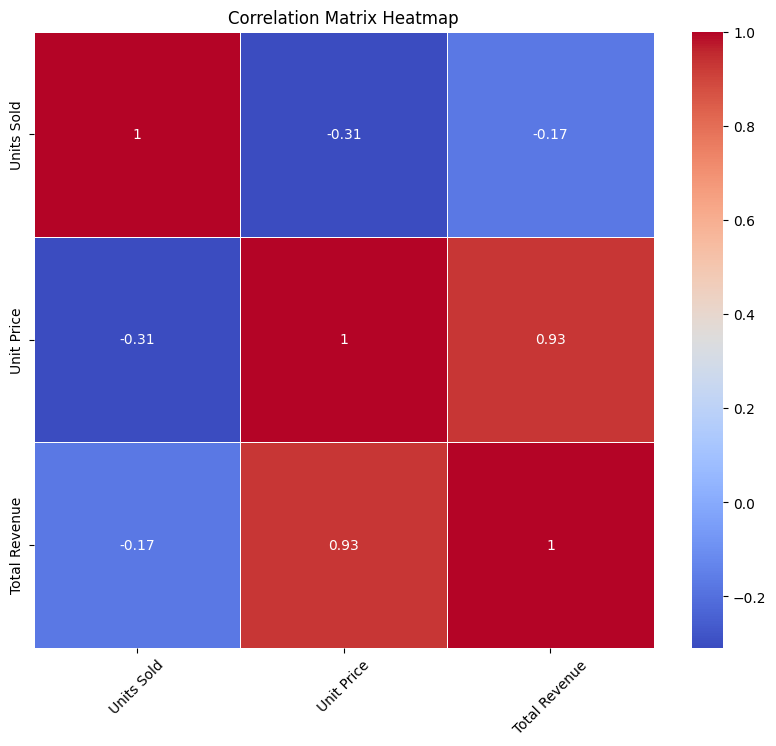

In [23]:
# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.show()


**Boxplots and Histograms for Numerical Data**

Boxplot for Units Sold

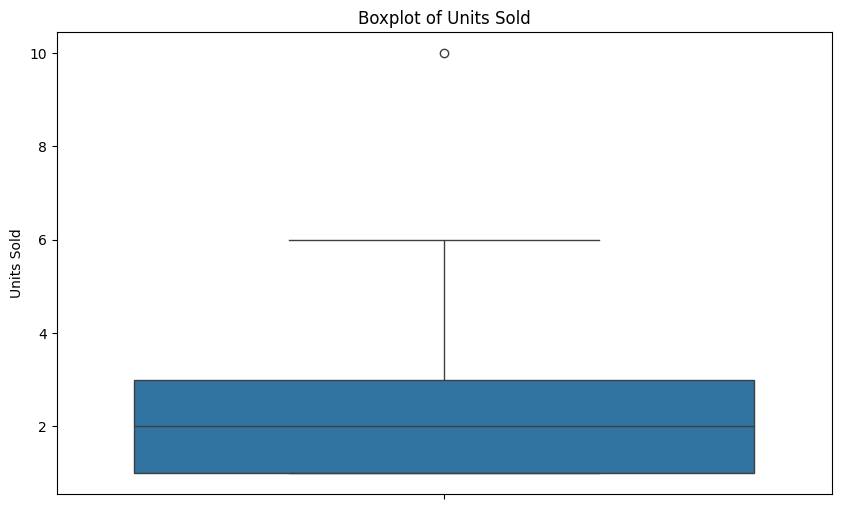

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Units Sold')
plt.title('Boxplot of Units Sold')
plt.show()


Histogram for Unit Price

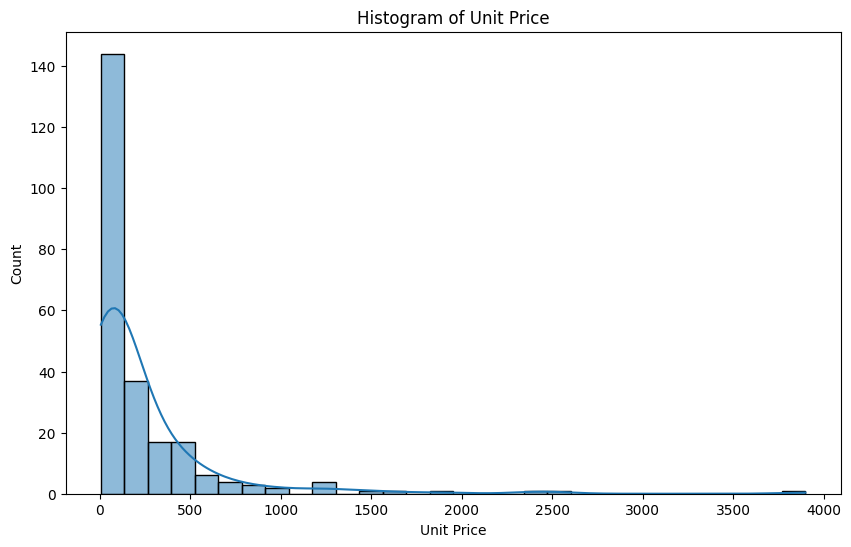

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Unit Price', bins=30, kde=True)
plt.title('Histogram of Unit Price')
plt.show()


## Questions & Answers

With Visuals

WITH MODELING

### 1. **Predicting Sales Categories or Products**

Objective: Predict the product category based on features like region, payment method, unit price, and quantity sold.

Model: Decision Tree Classifier

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Select features and target
features = df[['Region', 'Payment Method', 'Unit Price', 'Units Sold']]
target = df['Product Category']

# Convert categorical features to numeric using one-hot encoding
features = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


[[ 4  0  0  0  1  0]
 [ 0 14  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0 19  0  0]
 [ 2  0  0  0 11  0]
 [ 0  0  0  0  0 10]]
                 precision    recall  f1-score   support

Beauty Products       0.67      0.80      0.73         5
          Books       1.00      1.00      1.00        14
       Clothing       1.00      1.00      1.00        11
    Electronics       1.00      1.00      1.00        19
Home Appliances       0.92      0.85      0.88        13
         Sports       1.00      1.00      1.00        10

       accuracy                           0.96        72
      macro avg       0.93      0.94      0.93        72
   weighted avg       0.96      0.96      0.96        72

Accuracy: 0.9583333333333334


In [33]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Product Category'].unique(), yticklabels=df['Product Category'].unique())
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

Because of previous error:

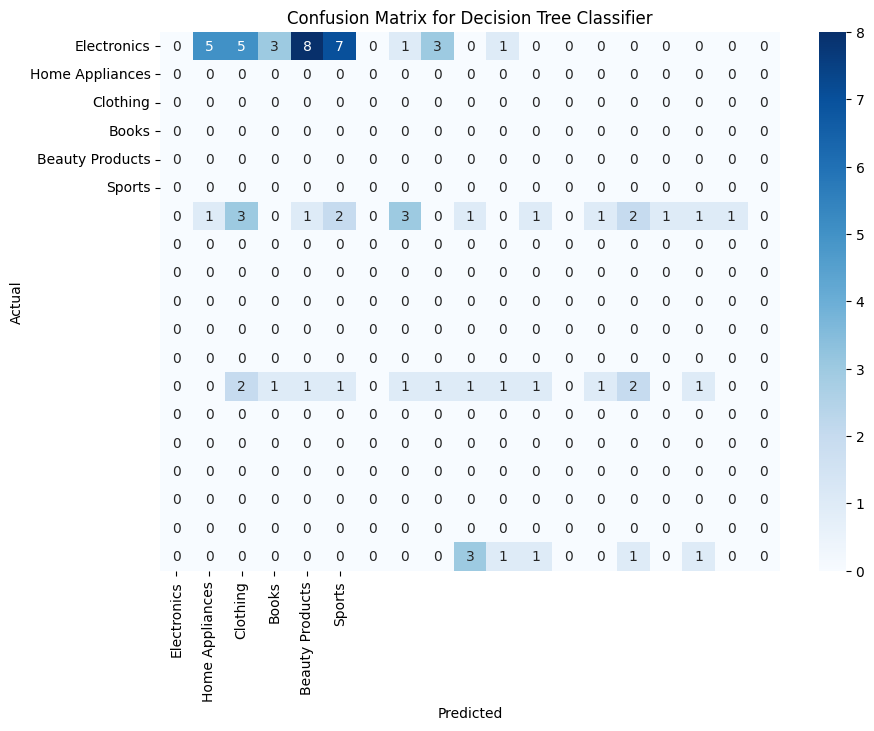

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      33.0
         1.0       0.00      0.00      0.00       0.0
         1.2       0.00      0.00      0.00       0.0
         1.4       0.00      0.00      0.00       0.0
         1.6       0.00      0.00      0.00       0.0
         1.8       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00      18.0
         2.0       0.00      0.00      0.00       0.0
         2.2       0.00      0.00      0.00       0.0
         2.4       0.00      0.00      0.00       0.0
         2.6       0.00      0.00      0.00       0.0
         2.8       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00      14.0
         3.0       0.00      0.00      0.00       0.0
         3.2       0.00      0.00      0.00       0.0
         3.4       0.00      0.00      0.00       0.0
         3.6       0.00      0.00      0.00       0.0
         3.8       0.00    

C:\Users\verya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\verya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\verya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: Undefi

In [39]:
# Ensure y_test and y_pred are strings (categorical)
y_test_str = y_test.astype(str)
y_pred_str = y_pred.astype(str)

# Compute confusion matrix
cm = confusion_matrix(y_test_str, y_pred_str)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Product Category'].unique(), yticklabels=df['Product Category'].unique())
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test_str, y_pred_str))

# Print accuracy
print('Accuracy:', accuracy_score(y_test_str, y_pred_str))


### 2. **Predicting Sales Volume**

Objective: Predict the sales volume (units sold) based on features like region, product category, payment method, and unit price.

Model: K-Nearest Neighbors Regressor

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
features = df[['Region', 'Product Category', 'Payment Method', 'Unit Price']]
target = df['Units Sold']

# Convert categorical features to numeric using one-hot encoding
features = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize and train the KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))


Mean Squared Error: 0.8122222222222223
R^2 Score: 0.21664000000000005


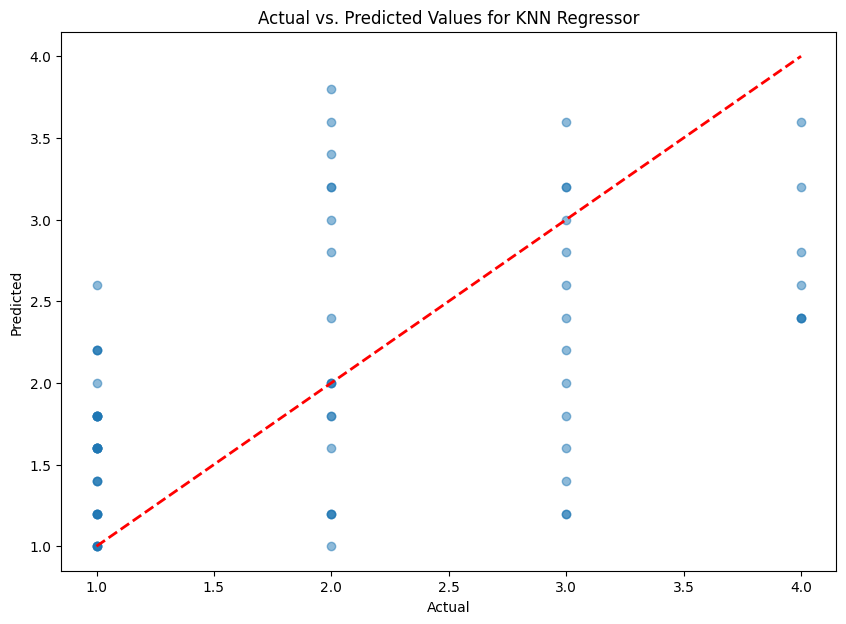

Mean Squared Error: 0.8122222222222223
R^2 Score: 0.21664000000000005


In [34]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values for KNN Regressor')
plt.show()

# Print Mean Squared Error and R^2 Score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))


### 3. **Clustering for Customer Segmentation**

Objective: Segment customers based on their purchase behavior (e.g., total revenue, units sold, and product category).

Model: K-Means Clustering

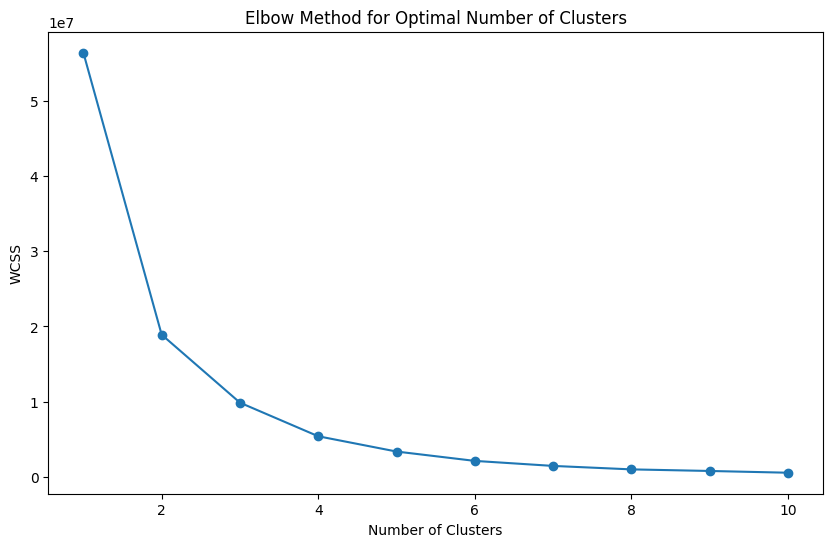

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
features = df[['Total Revenue', 'Units Sold']]
features = pd.get_dummies(features, drop_first=True)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(features)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters


Elbow Method Plot

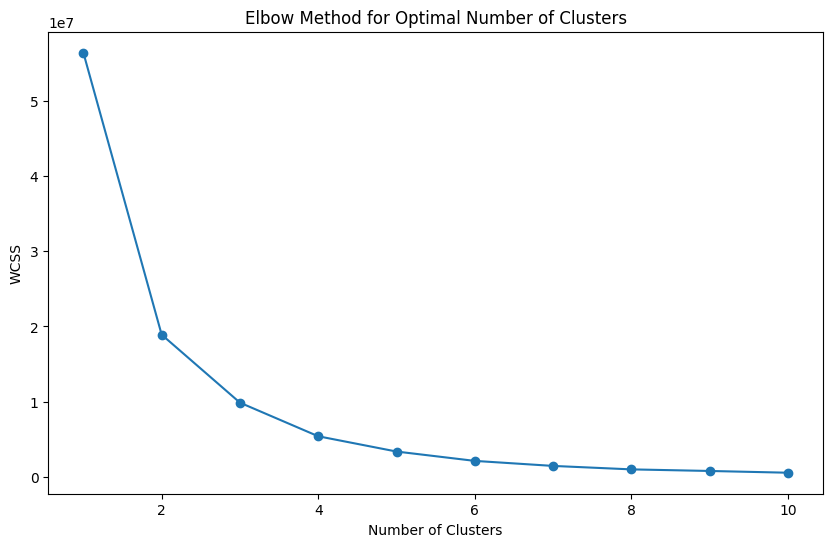

In [36]:
# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Cluster Visualization

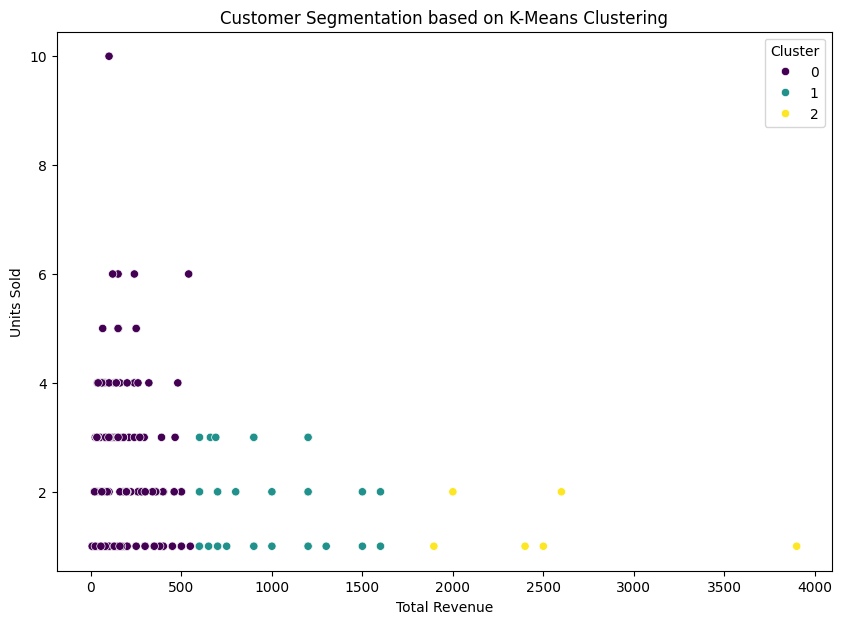

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Total Revenue', y='Units Sold', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation based on K-Means Clustering')
plt.xlabel('Total Revenue')
plt.ylabel('Units Sold')
plt.legend(title='Cluster')
plt.show()
